In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

In [2]:
df_train = pd.read_csv('price_data_tr.csv')


In [38]:
test_data = pd.read_csv('price_data_ts.csv')

In [3]:
df_train['price'].describe()

count    1.729100e+04
mean     5.397198e+05
std      3.634015e+05
min      7.500000e+04
25%      3.230000e+05
50%      4.500000e+05
75%      6.442250e+05
max      7.062500e+06
Name: price, dtype: float64

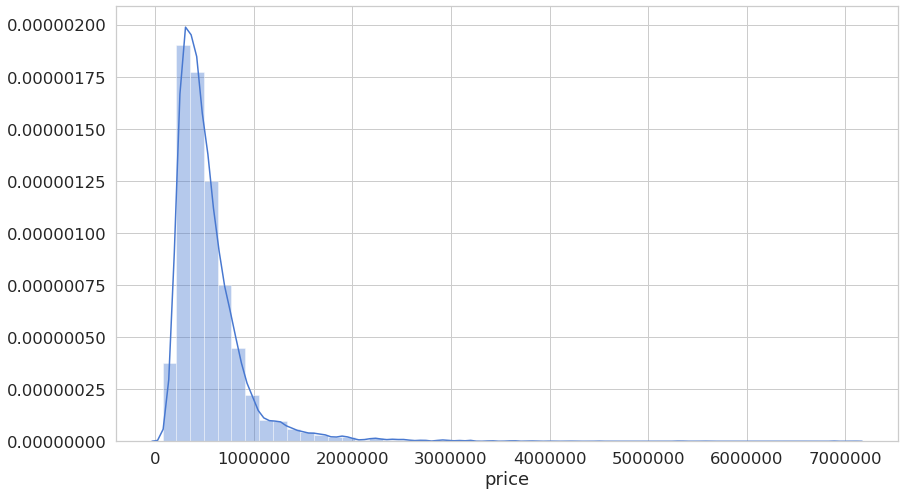

In [4]:
sns.distplot(df_train['price']);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


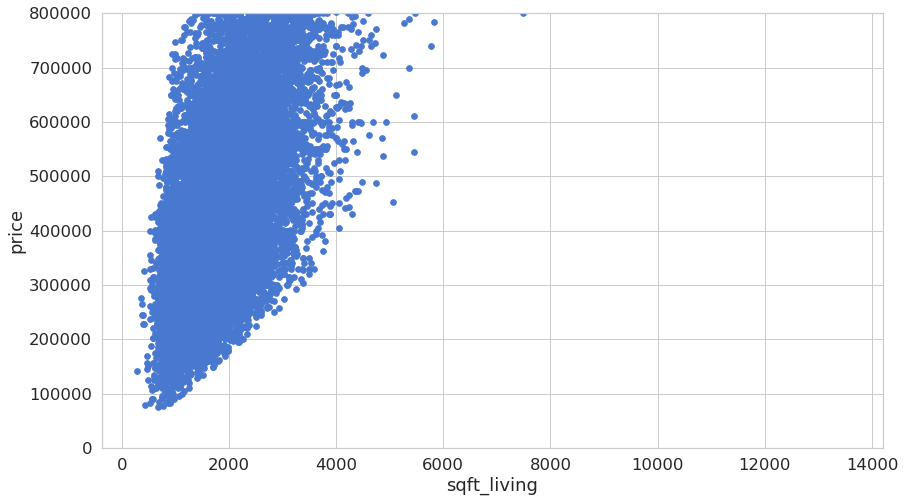

In [5]:
var = 'sqft_living'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


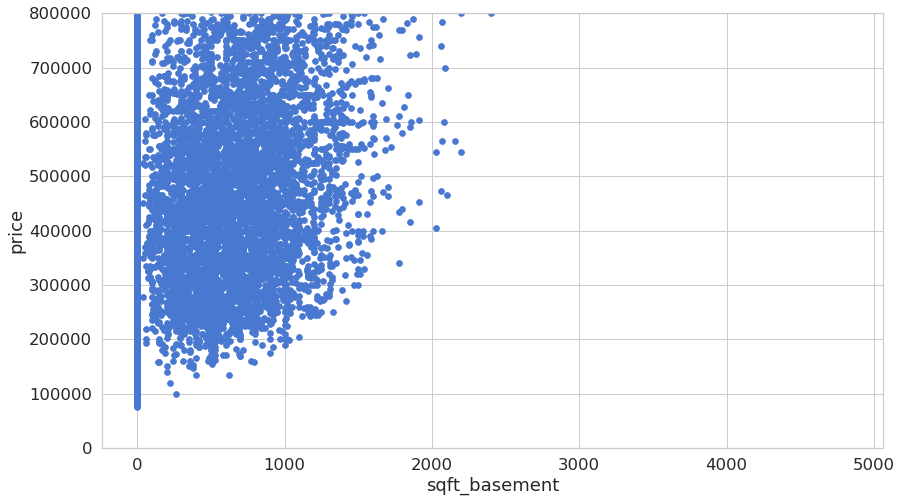

In [6]:
var = 'sqft_basement'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


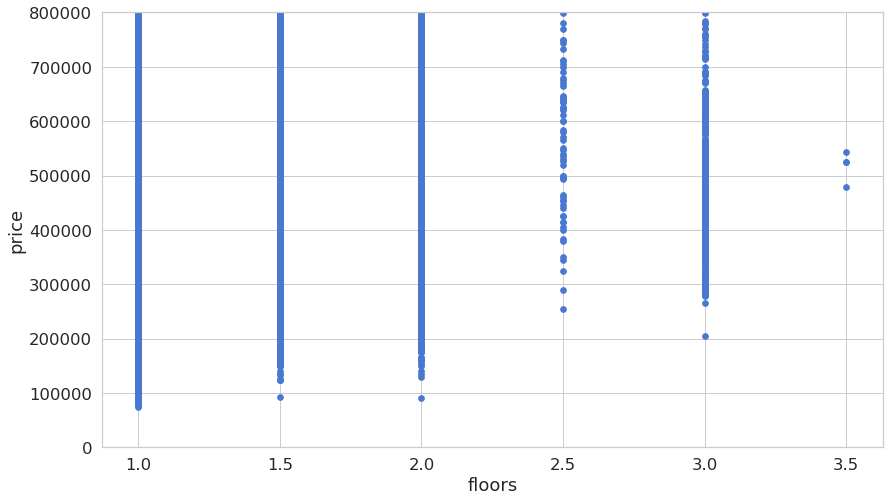

In [7]:
var = 'floors'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


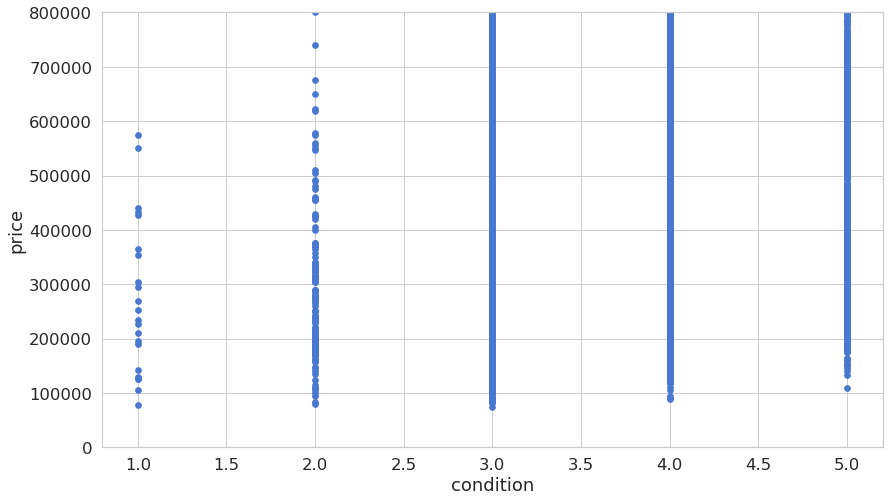

In [8]:
var = 'condition'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


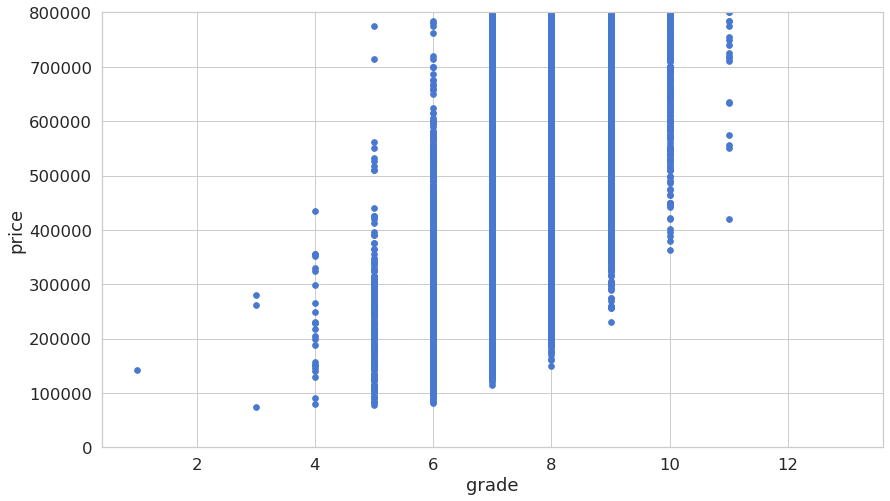

In [9]:
var = 'grade'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


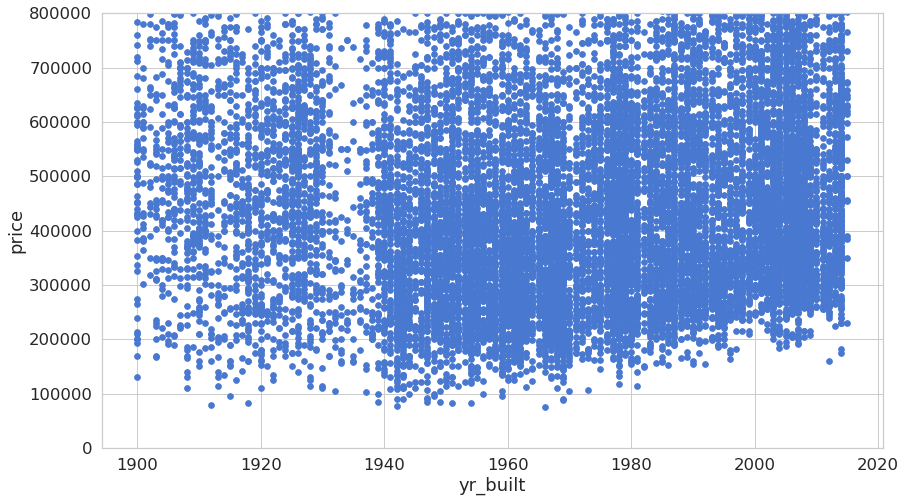

In [10]:
var = 'yr_built'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


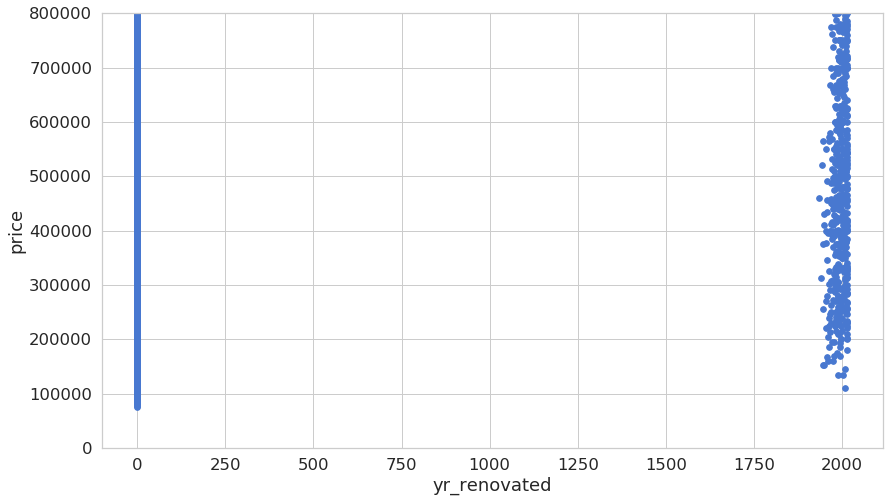

In [12]:
var = 'yr_renovated'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


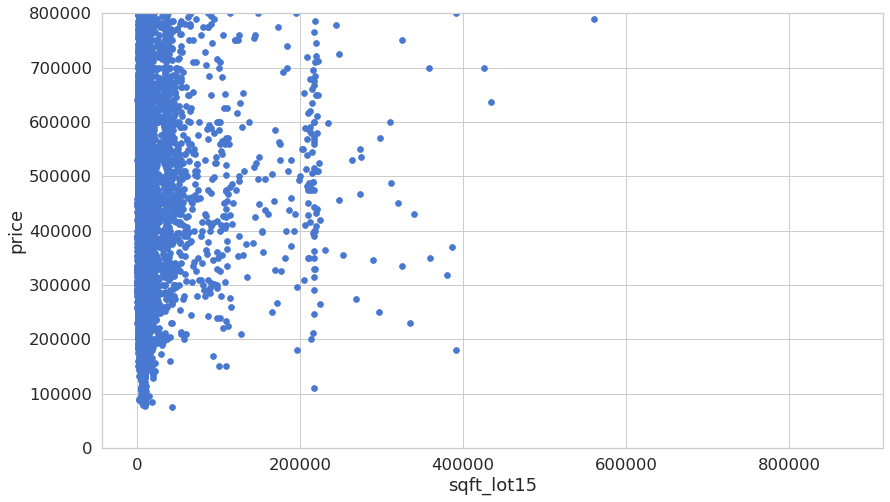

In [14]:
var = 'sqft_lot15'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000), s=32);

In [54]:
x = df_train[['bedrooms', 'bathrooms','sqft_living','sqft_lot','condition','grade','sqft_above','yr_built', 'yr_renovated','sqft_living15','sqft_lot15']]

In [31]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._w_history = [self._W]
    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = loss(prediction, y)
        
        self._cost_history.append(cost)
        
        self._gradient_descent_step(x, y, lr)
        
        self._w_history.append(self._W.copy())
    return self

In [55]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [56]:
x = (x - x.mean()) / x.std()
y = df_train['price']

In [57]:
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

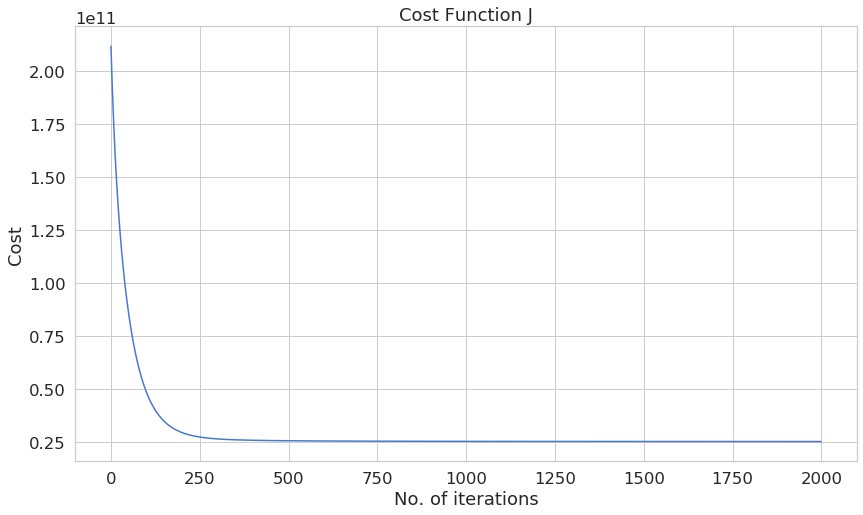

In [58]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [78]:
X_1 = test_data[['bedrooms', 'bathrooms','sqft_living','sqft_lot','condition','grade','sqft_above','yr_built', 'yr_renovated','sqft_living15','sqft_lot15']]

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,4,1.75,1230,7890,4,7,1090,1950,0,2380,13176
1,3,1.75,1770,7875,4,7,1170,1958,0,1670,8000
2,2,1.00,1080,9435,3,6,1080,1958,0,1200,9210
3,4,2.50,2300,7314,4,8,1420,1979,0,2010,7314
4,3,2.50,2830,6536,3,9,2830,1989,0,2710,6954
...,...,...,...,...,...,...,...,...,...,...,...
4317,4,2.50,2230,4952,3,8,2230,2011,0,2030,3721
4318,3,2.00,1740,3600,5,7,990,1923,0,1250,3600
4319,4,2.25,2290,10687,3,9,2290,1978,0,2290,10300
4320,4,2.00,2250,7500,5,7,1200,1956,0,1440,7500


In [60]:
X_1 = (X_1 - X_1.mean()) / X_1.std()
X_1 = np.c_[np.ones(X_1.shape[0]), X_1] 

In [61]:
Y_pred = clf.predict(X_1)

In [53]:
X_1[2, :]

array([ 1.        , -1.48981139, -1.42957385, -1.07525178, -0.14931769,
       -0.64620129, -1.40022139, -0.84487857, -0.42390802, -0.20539517,
       -1.14058047, -0.13747811])

In [44]:
X_1.shape

(4322, 12)

In [62]:
Y_pred

array([376641.14557198, 452877.25572984, 177674.14189194, ...,
       700599.96288467, 514319.68263337, 550819.34645543])

In [64]:
Y_pred

array([376641.14557198, 452877.25572984, 177674.14189194, ...,
       700599.96288467, 514319.68263337, 550819.34645543])

In [66]:
test_data['price'] = pd.Series(Y_pred.reshape(1, -1)[0])

In [76]:
submission = pd.concat([(test_data_2['id']+test_data_2['date']).str.zfill(25), test_data['price']], axis=1)

In [77]:
submission.to_csv('submission.csv', index=False)

In [70]:
test_data['date']

0       20140926T000000
1       20140923T000000
2       20140618T000000
3       20141119T000000
4       20140617T000000
             ...       
4317    20141006T000000
4318    20140721T000000
4319    20140527T000000
4320    20140513T000000
4321    20140625T000000
Name: date, Length: 4322, dtype: object

In [75]:
test_data_2 = pd.read_csv('price_data_ts.csv', dtype ='str')